In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
sales = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv')

In [69]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [70]:
sales.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [71]:
sales.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [72]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [73]:
reg_data = round(sales[['Sales2015','Sales2016','Region']].groupby('Region').sum(),2)

<AxesSubplot:xlabel='Region'>

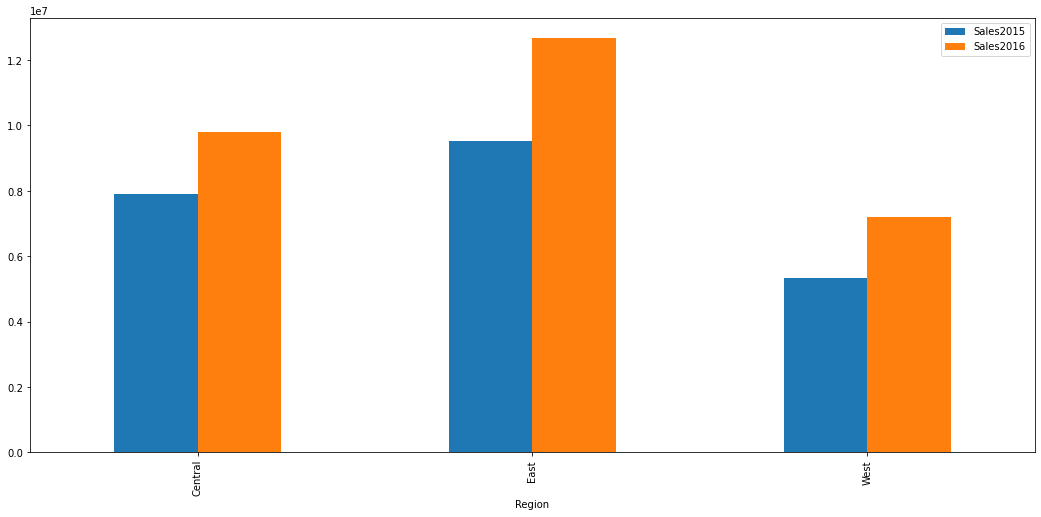

In [74]:
reg_data.plot(kind='bar',figsize=(18,8))


In [75]:
# sales of 2016 is high in all regions compared to sales in 2015

In [76]:
contribution_data = sales.groupby('Region')['Sales2016'].sum()

([<matplotlib.patches.Wedge at 0x291614f41f0>,
 [Text(0.6110194641522944, 1.0327900146820956, 'Central'),
  Text(-1.0592537591761817, -0.2966167117192283, 'East'),
  Text(0.7946393928910669, -0.7606235831643119, 'West')],
 [Text(0.356428020755505, 0.602460841897889, '33%'),
  Text(-0.5777747777324627, -0.1617909336650336, '43%'),
  Text(0.4334396688496728, -0.41488559081689735, '24%')])

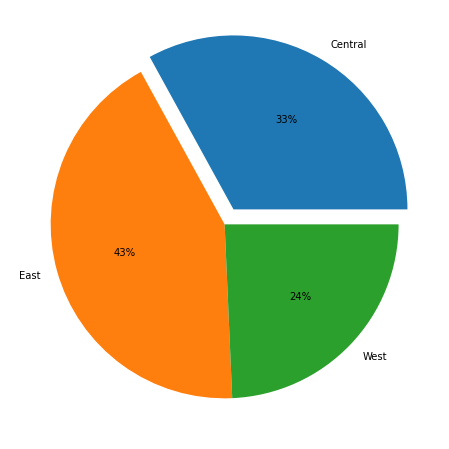

In [77]:
plt.figure(figsize=(18,8))
plt.pie(contribution_data,labels=['Central','East','West'],autopct='%1.0f%%',explode=[0.1,0,0])

In [78]:
# East region is contributing more in 2016

In [79]:
data1 = pd.pivot_table(data=sales,index='Region',columns='Tier',values=['Sales2015','Sales2016'],aggfunc=sum)

In [80]:
reg_tier_data = round(sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum().reset_index(),2)

In [81]:
central = reg_tier_data[reg_tier_data['Region']=='Central']

In [82]:
east = reg_tier_data[reg_tier_data['Region']=='East']

In [83]:
west = reg_tier_data[reg_tier_data['Region']=='West']

In [84]:
central

,Region,Tier,Sales2015,Sales2016
0,Central,High,4798698.43,6026042.94
1,Central,Low,943439.67,1132832.85
2,Central,Med,2068225.87,2632181.47
3,Central,Out,81364.89,-3248.53


<AxesSubplot:title={'center':'West'}, xlabel='Tier'>

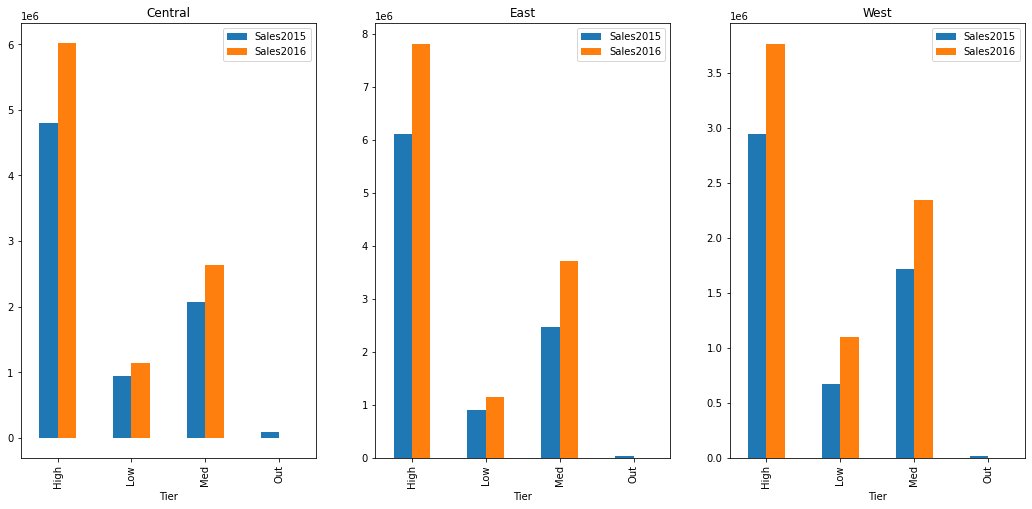

In [85]:
_,axes=plt.subplots(1,3,figsize=(18,8))
central.plot(kind='bar',x='Tier',ax=axes[0],title='Central')
east.plot(kind='bar',x='Tier',ax=axes[1],title='East',)
west.plot(kind='bar',x='Tier',ax=axes[2],title='West')

In [86]:
# East region with high tier has more sales than other region and tiers

In [87]:
specific_reg_data = sales[sales['Region']=='East'].groupby('State')[['Sales2015','Sales2016']].sum()

<AxesSubplot:xlabel='State'>

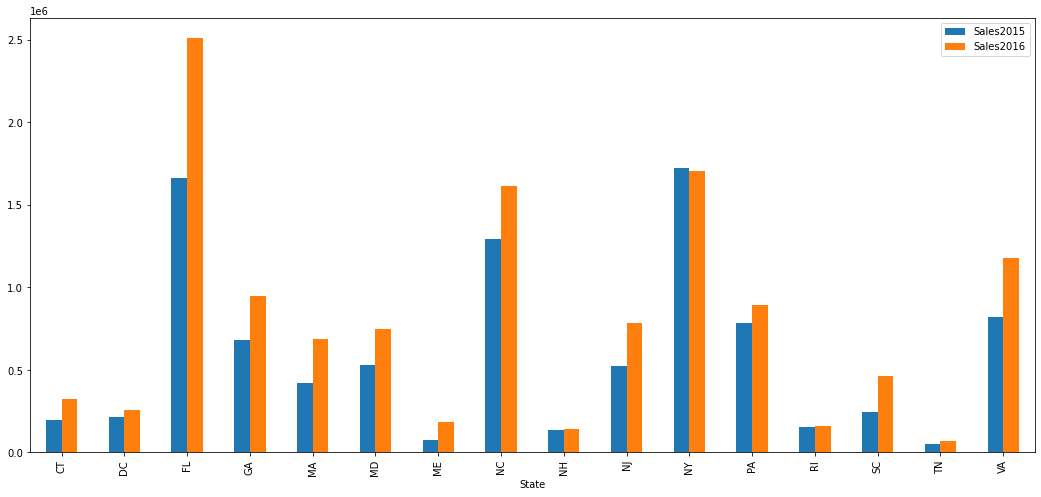

In [88]:
specific_reg_data.plot(kind='bar',figsize=(18,8))

In [89]:
# In East region NY state registerd a decline in 2016 compared to 2015

In [90]:
high_tier_div_data = sales[sales['Tier']=='High'].groupby('Division')[['Units2015','Units2016']].sum()

<AxesSubplot:xlabel='Division'>

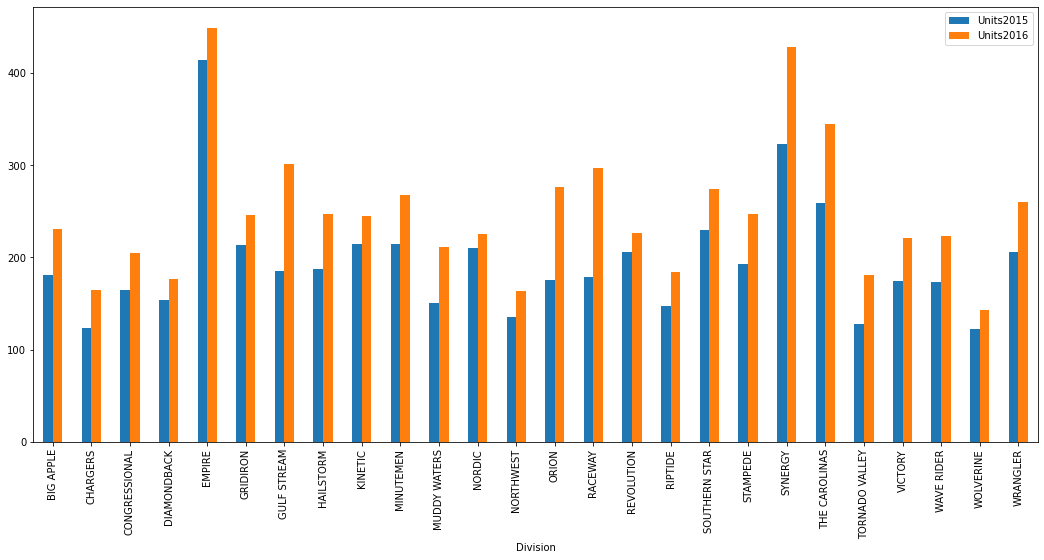

In [91]:
high_tier_div_data.plot(kind='bar',figsize=(18,8))

In [92]:
# In all the high tier,no division saw a decline in units in 2016 compared to 2015

In [93]:
#np.where(sales.Month==['Jan','Feb','Mar'],Q1,np.where(sales.Month==['Apr','May','Jun'],Q2,np.where(sales.Month==['Jul','Aug','Sep'],Q3,np.where(sales.Month==['Oct','Nov','Dec'],Q4))))

In [94]:
month = sales['Month']

In [95]:
qtr=[]
for i in month:
    if i in ['Jan','Feb','Mar']:
        qtr.append('Q1')
    elif i in ['Apr','May','Jun']:
        qtr.append('Q2')
    elif i in ['Jul','Aug','Sep']:
        qtr.append('Q3')
    else:
        qtr.append('Q4')

In [96]:
sales['Qtr'] = pd.Series(qtr)

In [97]:
Qtr_sales = round(sales.groupby('Qtr')[['Sales2015','Sales2016']].sum(),2)

<AxesSubplot:xlabel='Qtr'>

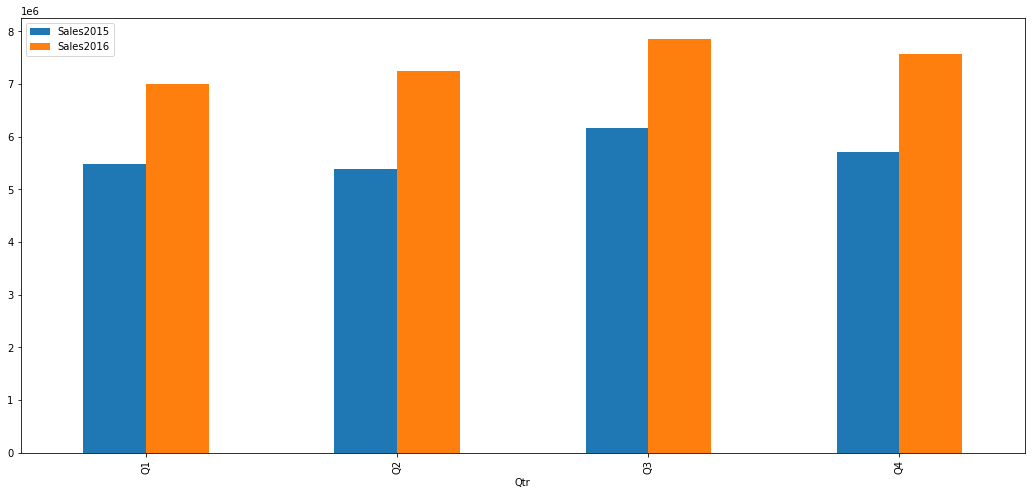

In [98]:
Qtr_sales.plot(kind='bar',figsize=(18,8))


In [99]:
# Q3 has more sales in both 2015 and 2016

In [100]:
Qtr_Tier_data = round(pd.pivot_table(data=sales,index='Qtr',columns='Tier',values='Sales2016',aggfunc=sum),2)

In [101]:
Qtr_Tier_data

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.60,948832.77,2181401.88,0.00
Q2,4130952.56,890594.75,2215813.86,0.00
Q3,4872559.25,795177.71,2197057.59,-3248.53
Q4,4740001.99,742659.39,2085206.80,0.00


([<matplotlib.patches.Wedge at 0x29162450df0>,
 [Text(-0.18126282943410987, 1.084962573854758, 'High'),
  Text(-0.799560358117465, -0.7554490278814788, 'Low'),
  Text(0.6133667663017865, -0.9131162083746459, 'Med'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'Out')],
 [Text(-0.09887063423678719, 0.5917977675571405, '55%'),
  Text(-0.4361238317004354, -0.41206310611717023, '14%'),
  Text(0.33456369071006536, -0.4980633863861704, '31%'),
  Text(0.5999999999999894, 1.1235210826979952e-07, '0%')])

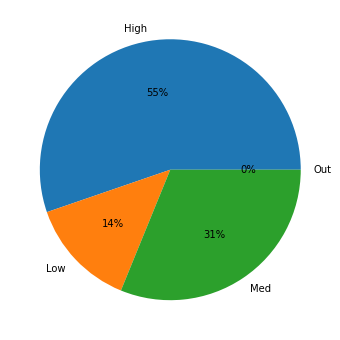

In [102]:
plt.figure(figsize=(8,6))
plt.pie(Qtr_Tier_data.loc['Q1',:],autopct='%1.0f%%',labels=['High','Low','Med','Out'])


([<matplotlib.patches.Wedge at 0x291621861c0>,
 [Text(-0.2425927674127825, 1.0729160028627627, 'High'),
  Text(-0.7412887176192838, -0.8127059967358169, 'Low'),
  Text(0.6292126741810101, -0.9022701428341637, 'Med'),
  Text(1.0999999999999954, -1.0298943298478347e-07, 'Out')],
 [Text(-0.1323233276796995, 0.5852269106524159, '57%'),
  Text(-0.40433930051960937, -0.4432941800377183, '12%'),
  Text(0.34320691318964186, -0.49214735063681647, '31%'),
  Text(0.5999999999999974, -5.617605435533643e-08, '0%')])

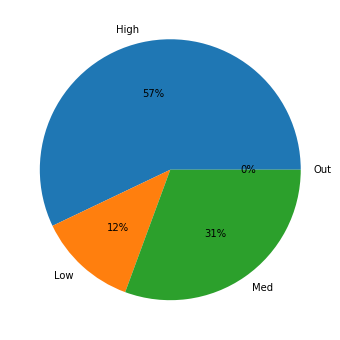

In [103]:
plt.figure(figsize=(8,6))
plt.pie(Qtr_Tier_data.loc['Q2',:],autopct='%1.0f%%',labels=['High','Low','Med','Out'])

ValueError: Wedge sizes 'x' must be non negative values

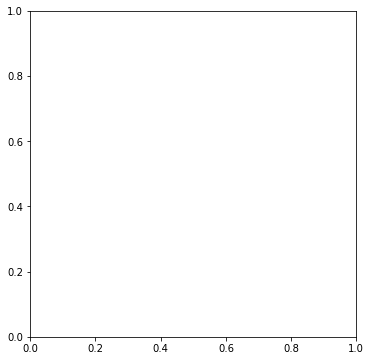

In [104]:
plt.figure(figsize=(8,6))
plt.pie(Qtr_Tier_data.loc['Q3',:],labels=['High','Low','Med','Out'])

([<matplotlib.patches.Wedge at 0x291655ccc40>,
 [Text(-0.425202413829697, 1.0144963811041414, 'High'),
  Text(-0.4969300028380246, -0.9813564960193625, 'Low'),
  Text(0.7129879791577799, -0.837644400432848, 'Med'),
  Text(1.1, -2.6942229581241775e-16, 'Out')],
 [Text(-0.23192858936165286, 0.5533616624204407, '63%'),
  Text(-0.27105272882074066, -0.5352853614651067, '10%'),
  Text(0.38890253408606174, -0.4568969456906443, '28%'),
  Text(0.6, -1.4695761589768238e-16, '0%')])

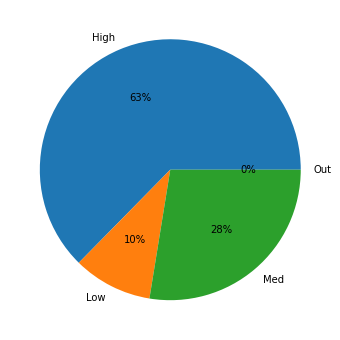

In [105]:
plt.figure(figsize=(8,6))
plt.pie(Qtr_Tier_data.loc['Q4',:],autopct='%1.0f%%',labels=['High','Low','Med','Out'])